In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r Srilanka_2021

In [5]:
Srilanka_2021

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
16,16,KIC Asalanka (SL),8,8,0,326,77,40.75,380,85.78,...,29,1,1/3,29.00,7.25,24.0,0,0,0,0
25,25,KNA Bandara (SL),5,5,1,141,55*,35.25,217,64.97,...,8,0,-,-,8.00,-,0,0,3,0
31,31,M Bhanuka (SL),5,5,0,104,36,20.80,155,67.09,...,-,-,-,-,-,-,-,-,5,1
52,52,PVD Chameera (SL),14,12,3,110,29,12.22,168,65.47,...,586,20,5/16,29.30,5.51,31.9,0,1,2,0
53,53,LD Chandimal (SL),4,4,0,108,71,27.00,161,67.08,...,-,-,-,-,-,-,-,-,2,1
64,64,A Dananjaya (SL),3,3,1,8,5*,4.00,6,133.33,...,155,5,3/44,31.00,5.74,32.4,0,0,0,0
70,70,DM de Silva (SL),11,11,1,304,91,30.40,420,72.38,...,234,6,3/45,39.00,5.20,45.0,0,0,7,0
71,71,PWH de Silva (SL),14,14,1,356,80*,27.38,376,94.68,...,552,12,3/37,46.00,4.56,60.5,0,0,3,0
74,74,N Dickwella (SL),1,1,0,7,7,7.00,9,77.77,...,-,-,-,-,-,-,-,-,3,0
85,85,AM Fernando (SL),3,2,1,1,1*,1.00,6,16.66,...,116,0,-,-,6.44,-,0,0,0,0


In [6]:
Srilanka_2021=Srilanka_2021.reset_index()

In [7]:
Srilanka_2021

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,16,16,KIC Asalanka (SL),8,8,0,326,77,40.75,380,...,29,1,1/3,29.00,7.25,24.0,0,0,0,0
1,25,25,KNA Bandara (SL),5,5,1,141,55*,35.25,217,...,8,0,-,-,8.00,-,0,0,3,0
2,31,31,M Bhanuka (SL),5,5,0,104,36,20.80,155,...,-,-,-,-,-,-,-,-,5,1
3,52,52,PVD Chameera (SL),14,12,3,110,29,12.22,168,...,586,20,5/16,29.30,5.51,31.9,0,1,2,0
4,53,53,LD Chandimal (SL),4,4,0,108,71,27.00,161,...,-,-,-,-,-,-,-,-,2,1
5,64,64,A Dananjaya (SL),3,3,1,8,5*,4.00,6,...,155,5,3/44,31.00,5.74,32.4,0,0,0,0
6,70,70,DM de Silva (SL),11,11,1,304,91,30.40,420,...,234,6,3/45,39.00,5.20,45.0,0,0,7,0
7,71,71,PWH de Silva (SL),14,14,1,356,80*,27.38,376,...,552,12,3/37,46.00,4.56,60.5,0,0,3,0
8,74,74,N Dickwella (SL),1,1,0,7,7,7.00,9,...,-,-,-,-,-,-,-,-,3,0
9,85,85,AM Fernando (SL),3,2,1,1,1*,1.00,6,...,116,0,-,-,6.44,-,0,0,0,0


In [8]:
Srilanka_2021.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
Srilanka_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,KIC Asalanka (SL),8,8,0,326,77,40.75,380,85.78,0,...,29,1,1/3,29.00,7.25,24.0,0,0,0,0
1,KNA Bandara (SL),5,5,1,141,55*,35.25,217,64.97,0,...,8,0,-,-,8.00,-,0,0,3,0
2,M Bhanuka (SL),5,5,0,104,36,20.80,155,67.09,0,...,-,-,-,-,-,-,-,-,5,1
3,PVD Chameera (SL),14,12,3,110,29,12.22,168,65.47,0,...,586,20,5/16,29.30,5.51,31.9,0,1,2,0
4,LD Chandimal (SL),4,4,0,108,71,27.00,161,67.08,0,...,-,-,-,-,-,-,-,-,2,1
5,A Dananjaya (SL),3,3,1,8,5*,4.00,6,133.33,0,...,155,5,3/44,31.00,5.74,32.4,0,0,0,0
6,DM de Silva (SL),11,11,1,304,91,30.40,420,72.38,0,...,234,6,3/45,39.00,5.20,45.0,0,0,7,0
7,PWH de Silva (SL),14,14,1,356,80*,27.38,376,94.68,0,...,552,12,3/37,46.00,4.56,60.5,0,0,3,0
8,N Dickwella (SL),1,1,0,7,7,7.00,9,77.77,0,...,-,-,-,-,-,-,-,-,3,0
9,AM Fernando (SL),3,2,1,1,1*,1.00,6,16.66,0,...,116,0,-,-,6.44,-,0,0,0,0


In [10]:
Srilanka_2021_players =Srilanka_2021.copy()

In [11]:
Srilanka_2021_players.drop('Player',axis=1,inplace=True)

In [12]:
Srilanka_2021_players.HS=Srilanka_2021_players.HS.str.extract('(\d+)')
Srilanka_2021_players['HS'].fillna(value=0, inplace=True)


In [13]:
Srilanka_2021_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,8,8,0,326,77,40.75,380,85.78,0,3,...,29,1,1/3,29.00,7.25,24.0,0,0,0,0
1,5,5,1,141,55,35.25,217,64.97,0,2,...,8,0,-,-,8.00,-,0,0,3,0
2,5,5,0,104,36,20.80,155,67.09,0,0,...,-,-,-,-,-,-,-,-,5,1
3,14,12,3,110,29,12.22,168,65.47,0,0,...,586,20,5/16,29.30,5.51,31.9,0,1,2,0
4,4,4,0,108,71,27.00,161,67.08,0,1,...,-,-,-,-,-,-,-,-,2,1
5,3,3,1,8,5,4.00,6,133.33,0,0,...,155,5,3/44,31.00,5.74,32.4,0,0,0,0
6,11,11,1,304,91,30.40,420,72.38,0,2,...,234,6,3/45,39.00,5.20,45.0,0,0,7,0
7,14,14,1,356,80,27.38,376,94.68,0,3,...,552,12,3/37,46.00,4.56,60.5,0,0,3,0
8,1,1,0,7,7,7.00,9,77.77,0,0,...,-,-,-,-,-,-,-,-,3,0
9,3,2,1,1,1,1.00,6,16.66,0,0,...,116,0,-,-,6.44,-,0,0,0,0


In [14]:
Srilanka_2021_players.replace("-",0,inplace=True)

In [15]:
Srilanka_2021_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

Srilanka_2021_players_scaled = pd.DataFrame(scaler.fit_transform(Srilanka_2021_players),columns=Srilanka_2021_players.columns)
Srilanka_2021_players_scaled.shape
Srilanka_2021_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.794931,0.903340,-0.677057,2.013877,1.173535,1.660979,1.877858,0.606488,-0.254,2.656095,...,-0.379473,-0.489556,-0.376448,0.297943,1.162883,0.018642,-0.176777,-0.176777,-0.889805,-0.254000
1,0.000000,0.090334,0.294372,0.369758,0.543833,1.262281,0.667143,-0.180983,-0.254,1.573982,...,-0.379473,-0.632585,-0.620032,-0.944190,1.423631,-0.946359,-0.176777,-0.176777,0.945418,-0.254000
2,0.000000,0.090334,-0.677057,0.040935,0.000000,0.214792,0.206625,-0.100760,-0.254,-0.590243,...,-0.379473,-0.687071,-0.620032,-0.944190,-1.357681,-0.946359,-0.176777,-0.176777,2.168899,3.937004
3,2.384792,1.987349,2.237230,0.094257,-0.200360,-0.407177,0.303185,-0.162063,-0.254,-0.590243,...,2.403331,3.304093,4.251646,0.310793,0.557948,0.336288,-0.176777,5.656854,0.333677,-0.254000
4,-0.264977,-0.180668,-0.677057,0.076483,1.001798,0.664233,0.251191,-0.101139,-0.254,0.491869,...,-0.379473,-0.687071,-0.620032,-0.944190,-1.357681,-0.946359,-0.176777,-0.176777,0.333677,3.937004


In [17]:
Srilanka_2021_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,...,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01
mean,4.037175e-17,-1.042937e-16,-9.756505e-17,2.859665e-17,1.009294e-17,3.700743e-17,-4.373606e-17,7.401487e-17,1.682156e-17,-8.074349e-17,...,-2.018587e-17,3.196097e-17,6.728624e-18,-1.345725e-16,-3.364312e-18,-1.076580e-16,4.373606e-17,6.728624e-18,-1.177509e-17,-5.719331e-17
std,1.015505e+00,1.015505e+00,1.015505e+00,1.015505e+00,1.015505e+00,1.015505e+00,1.015505e+00,1.015505e+00,1.015505e+00,1.015505e+00,...,1.015505e+00,1.015505e+00,1.015505e+00,1.015505e+00,1.015505e+00,1.015505e+00,1.015505e+00,1.015505e+00,1.015505e+00,1.015505e+00
min,-1.059908e+00,-1.264676e+00,-6.770565e-01,-8.833266e-01,-1.030421e+00,-1.293012e+00,-9.446687e-01,-2.639513e+00,-2.540003e-01,-5.902433e-01,...,-3.794733e-01,-6.870714e-01,-6.200317e-01,-9.441904e-01,-1.357681e+00,-9.463590e-01,-1.767767e-01,-1.767767e-01,-8.898048e-01,-2.540003e-01
25%,-7.949307e-01,-7.226723e-01,-6.770565e-01,-8.122295e-01,-8.300614e-01,-7.855782e-01,-8.555363e-01,-1.840105e-01,-2.540003e-01,-5.902433e-01,...,-3.794733e-01,-6.870714e-01,-6.200317e-01,-9.441904e-01,-1.357681e+00,-9.463590e-01,-1.767767e-01,-1.767767e-01,-8.898048e-01,-2.540003e-01
50%,-2.649769e-01,-4.516702e-01,-6.770565e-01,-4.656316e-01,-4.293421e-01,-2.056536e-01,-5.732836e-01,9.336408e-02,-2.540003e-01,-5.902433e-01,...,-3.794733e-01,-3.601501e-01,-3.764478e-01,8.378238e-02,4.710320e-01,1.864207e-02,-1.767767e-01,-1.767767e-01,-2.780640e-01,-2.540003e-01
75%,5.299538e-01,3.613361e-01,2.943724e-01,3.697583e-01,5.438334e-01,6.917798e-01,6.671427e-01,5.584300e-01,-2.540003e-01,4.918694e-01,...,-3.794733e-01,2.392057e-01,1.107200e-01,6.620171e-01,7.283034e-01,7.826013e-01,-1.767767e-01,-1.767767e-01,3.336768e-01,-2.540003e-01
max,2.384792e+00,2.529353e+00,3.208659e+00,2.280491e+00,2.404316e+00,1.980662e+00,2.174966e+00,2.405828e+00,3.937004e+00,2.656095e+00,...,4.490434e+00,3.304093e+00,4.251646e+00,2.054064e+00,1.423631e+00,2.109478e+00,5.656854e+00,5.656854e+00,3.392381e+00,3.937004e+00


In [18]:
X =  Srilanka_2021_players_scaled.iloc[:,:].values

In [19]:
X

array([[ 7.94930748e-01,  9.03340323e-01, -6.77056531e-01,
         2.01387682e+00,  1.17353513e+00,  1.66097876e+00,
         1.87785820e+00,  6.06488097e-01, -2.54000254e-01,
         2.65609463e+00,  1.04880885e+00,  1.55191304e+00,
         9.45962218e-01, -1.46871054e+00,  7.94930748e-01,
        -1.97499484e-01, -5.10901933e-01, -3.79473319e-01,
        -4.89556435e-01, -3.76447842e-01,  2.97943374e-01,
         1.16288340e+00,  1.86420668e-02, -1.76776695e-01,
        -1.76776695e-01, -8.89804797e-01, -2.54000254e-01],
       [ 0.00000000e+00,  9.03340323e-02,  2.94372405e-01,
         3.69758340e-01,  5.43833354e-01,  1.26228059e+00,
         6.67142718e-01, -1.80983203e-01, -2.54000254e-01,
         1.57398201e+00, -5.24404424e-01,  1.09289651e-01,
        -2.10213826e-01, -1.36771331e+00,  0.00000000e+00,
        -4.80868310e-01, -6.14846222e-01, -3.79473319e-01,
        -6.32584517e-01, -6.20031741e-01, -9.44190404e-01,
         1.42363139e+00, -9.46359039e-01, -1.76776695e-

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(Srilanka_2021_players_scaled))

False

In [23]:
Srilanka_2021_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.794931,0.903340,-0.677057,2.013877,1.173535,1.660979,1.877858,0.606488,-0.254000,2.656095,...,-0.379473,-0.489556,-0.376448,0.297943,1.162883,0.018642,-0.176777,-0.176777,-0.889805,-0.254000
1,0.000000,0.090334,0.294372,0.369758,0.543833,1.262281,0.667143,-0.180983,-0.254000,1.573982,...,-0.379473,-0.632585,-0.620032,-0.944190,1.423631,-0.946359,-0.176777,-0.176777,0.945418,-0.254000
2,0.000000,0.090334,-0.677057,0.040935,0.000000,0.214792,0.206625,-0.100760,-0.254000,-0.590243,...,-0.379473,-0.687071,-0.620032,-0.944190,-1.357681,-0.946359,-0.176777,-0.176777,2.168899,3.937004
3,2.384792,1.987349,2.237230,0.094257,-0.200360,-0.407177,0.303185,-0.162063,-0.254000,-0.590243,...,2.403331,3.304093,4.251646,0.310793,0.557948,0.336288,-0.176777,5.656854,0.333677,-0.254000
4,-0.264977,-0.180668,-0.677057,0.076483,1.001798,0.664233,0.251191,-0.101139,-0.254000,0.491869,...,-0.379473,-0.687071,-0.620032,-0.944190,-1.357681,-0.946359,-0.176777,-0.176777,0.333677,3.937004
5,-0.529954,-0.451670,0.294372,-0.812230,-0.887307,-1.003050,-0.900102,2.405828,-0.254000,-0.590243,...,-0.379473,0.368612,0.597888,0.383608,0.637911,0.356392,-0.176777,-0.176777,-0.889805,-0.254000
6,1.589861,1.716347,0.294372,1.818360,1.574254,0.910701,2.174966,0.099419,-0.254000,1.573982,...,-0.379473,0.906670,0.841472,0.726265,0.450172,0.863018,-0.176777,-0.176777,3.392381,-0.254000
7,2.384792,2.529353,0.294372,2.280491,1.259404,0.691780,1.848147,0.943273,-0.254000,2.656095,...,4.490434,3.072524,2.302975,1.026091,0.227667,1.486248,-0.176777,-0.176777,0.945418,-0.254000
8,-1.059908,-0.993674,-0.677057,-0.821117,-0.830061,-0.785578,-0.877819,0.303382,-0.254000,-0.590243,...,-0.379473,-0.687071,-0.620032,-0.944190,-1.357681,-0.946359,-0.176777,-0.176777,0.945418,-0.254000
9,-0.529954,-0.722672,0.294372,-0.874439,-1.001798,-1.220522,-0.900102,-2.009082,-0.254000,-0.590243,...,-0.379473,0.102988,-0.620032,-0.944190,0.881276,-0.946359,-0.176777,-0.176777,-0.889805,-0.254000


In [24]:
np.all(np.isfinite(Srilanka_2021_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


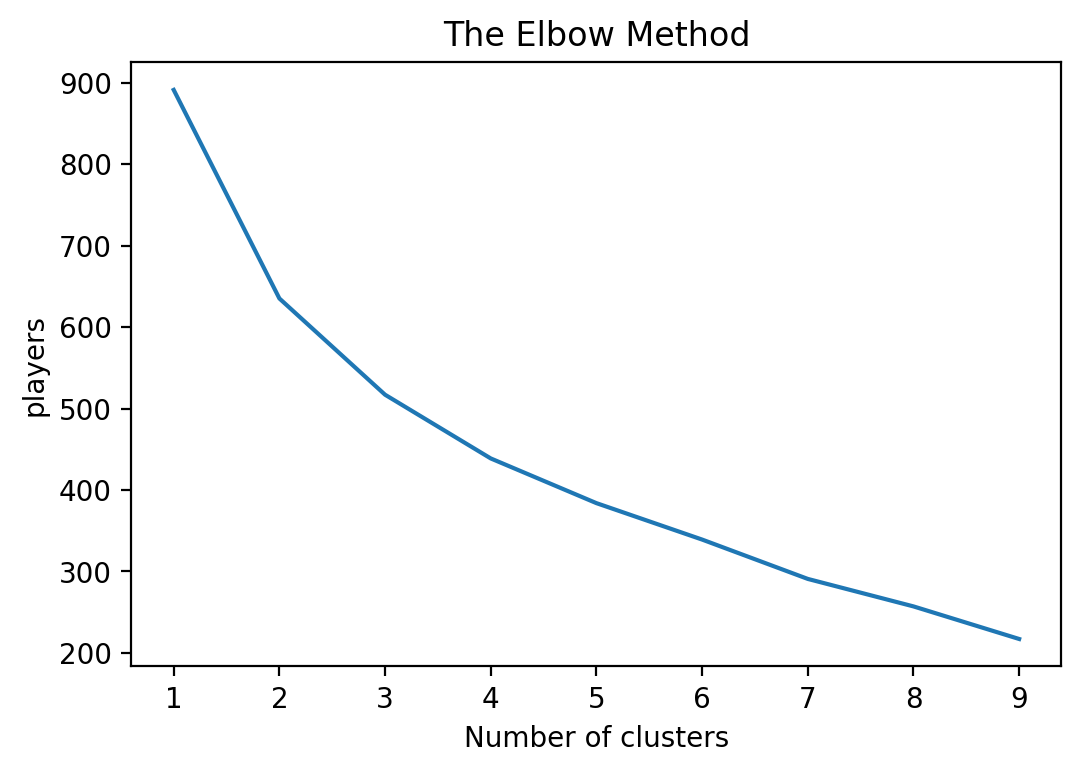

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [28]:
kmeans.cluster_centers_

array([[ 0.98419997,  1.05819866,  0.15559684,  1.53524155,  1.39842862,
         1.38530746,  1.53193949,  0.47263906,  0.94342951,  0.95563193,
         0.14982984,  1.46358916,  0.72573821, -0.14933405,  0.98419997,
         0.36923817, -0.0109794 , -0.28008745, -0.03517471, -0.02847085,
         0.27652727,  0.00466562,  0.35754126, -0.1767767 , -0.1767767 ,
         0.77063451, -0.25400025],
       [-0.48579101, -0.49683718, -0.15086586, -0.54672662, -0.45200184,
        -0.41590644, -0.53645455, -0.17040349, -0.25400025, -0.36480312,
        -0.06555055, -0.49609695, -0.40290983,  0.12339855, -0.48579101,
        -0.35099093, -0.27067513, -0.20554805, -0.25543309, -0.26480522,
        -0.13635728, -0.03409478, -0.18022188,  0.06629126, -0.1767767 ,
        -0.278064  ,  0.0952501 ],
       [ 2.38479224,  2.25835081,  1.26580134,  1.18737401,  0.52952195,
         0.1423012 ,  1.07566635,  0.39060517, -0.25400025,  1.03292569,
         0.26220221,  0.83060135,  2.29483427, -0.9581

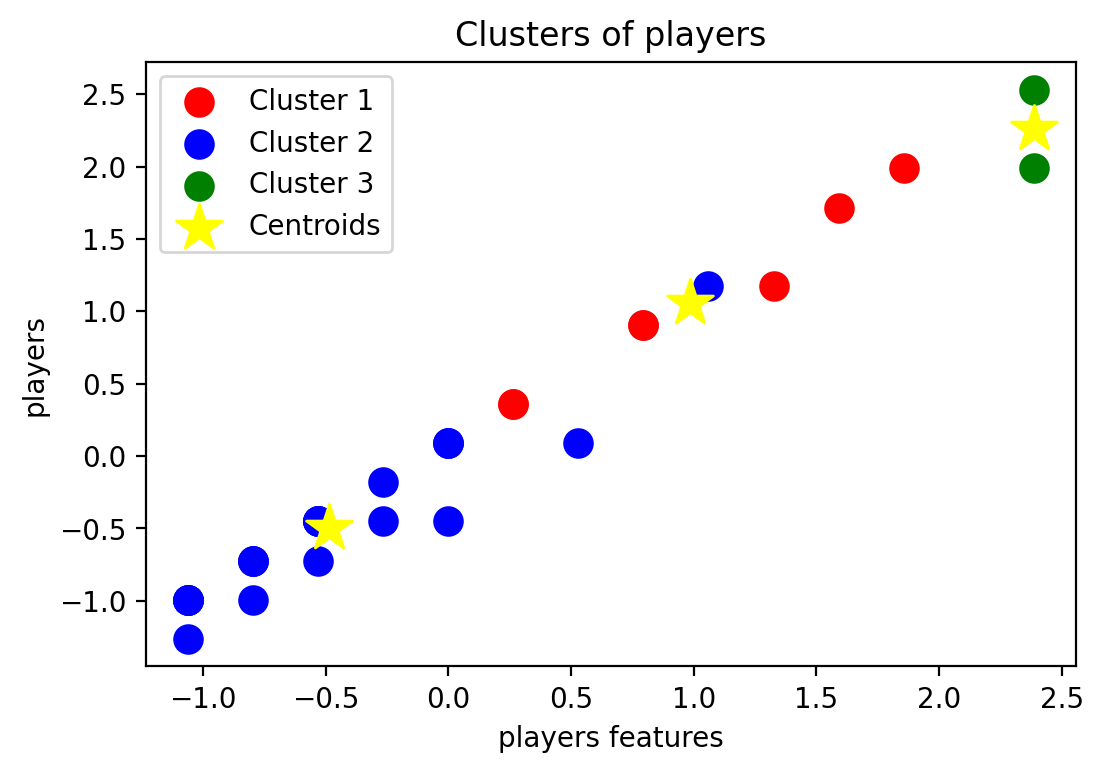

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
Srilanka_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,KIC Asalanka (SL),8,8,0,326,77,40.75,380,85.78,0,...,29,1,1/3,29.00,7.25,24.0,0,0,0,0
1,KNA Bandara (SL),5,5,1,141,55*,35.25,217,64.97,0,...,8,0,-,-,8.00,-,0,0,3,0
2,M Bhanuka (SL),5,5,0,104,36,20.80,155,67.09,0,...,-,-,-,-,-,-,-,-,5,1
3,PVD Chameera (SL),14,12,3,110,29,12.22,168,65.47,0,...,586,20,5/16,29.30,5.51,31.9,0,1,2,0
4,LD Chandimal (SL),4,4,0,108,71,27.00,161,67.08,0,...,-,-,-,-,-,-,-,-,2,1
5,A Dananjaya (SL),3,3,1,8,5*,4.00,6,133.33,0,...,155,5,3/44,31.00,5.74,32.4,0,0,0,0
6,DM de Silva (SL),11,11,1,304,91,30.40,420,72.38,0,...,234,6,3/45,39.00,5.20,45.0,0,0,7,0
7,PWH de Silva (SL),14,14,1,356,80*,27.38,376,94.68,0,...,552,12,3/37,46.00,4.56,60.5,0,0,3,0
8,N Dickwella (SL),1,1,0,7,7,7.00,9,77.77,0,...,-,-,-,-,-,-,-,-,3,0
9,AM Fernando (SL),3,2,1,1,1*,1.00,6,16.66,0,...,116,0,-,-,6.44,-,0,0,0,0


In [31]:
Srilanka_2021["cluster"] = y_kmeans

In [32]:
Srilanka_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,KIC Asalanka (SL),8,8,0,326,77,40.75,380,85.78,0,...,1,1/3,29.00,7.25,24.0,0,0,0,0,0
1,KNA Bandara (SL),5,5,1,141,55*,35.25,217,64.97,0,...,0,-,-,8.00,-,0,0,3,0,1
2,M Bhanuka (SL),5,5,0,104,36,20.80,155,67.09,0,...,-,-,-,-,-,-,-,5,1,1
3,PVD Chameera (SL),14,12,3,110,29,12.22,168,65.47,0,...,20,5/16,29.30,5.51,31.9,0,1,2,0,2
4,LD Chandimal (SL),4,4,0,108,71,27.00,161,67.08,0,...,-,-,-,-,-,-,-,2,1,1
5,A Dananjaya (SL),3,3,1,8,5*,4.00,6,133.33,0,...,5,3/44,31.00,5.74,32.4,0,0,0,0,1
6,DM de Silva (SL),11,11,1,304,91,30.40,420,72.38,0,...,6,3/45,39.00,5.20,45.0,0,0,7,0,0
7,PWH de Silva (SL),14,14,1,356,80*,27.38,376,94.68,0,...,12,3/37,46.00,4.56,60.5,0,0,3,0,2
8,N Dickwella (SL),1,1,0,7,7,7.00,9,77.77,0,...,-,-,-,-,-,-,-,3,0,1
9,AM Fernando (SL),3,2,1,1,1*,1.00,6,16.66,0,...,0,-,-,6.44,-,0,0,0,0,1


In [33]:
Srilanka_2021['cluster'].value_counts()

1    24
0     7
2     2
Name: cluster, dtype: int64

In [36]:
SL_Cluster_2021 = np.array([7,24,2])

In [37]:
SL_Cluster_2021

array([ 7, 24,  2])

In [38]:
%store SL_Cluster_2021

Stored 'SL_Cluster_2021' (ndarray)


In [39]:
Srilanka_2021_players_scaled.insert(0, 'Player', Srilanka_2021.Player)

In [40]:
Srilanka_2021_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,KIC Asalanka (SL),0.794931,0.903340,-0.677057,2.013877,1.173535,1.660979,1.877858,0.606488,-0.254000,...,-0.379473,-0.489556,-0.376448,0.297943,1.162883,0.018642,-0.176777,-0.176777,-0.889805,-0.254000
1,KNA Bandara (SL),0.000000,0.090334,0.294372,0.369758,0.543833,1.262281,0.667143,-0.180983,-0.254000,...,-0.379473,-0.632585,-0.620032,-0.944190,1.423631,-0.946359,-0.176777,-0.176777,0.945418,-0.254000
2,M Bhanuka (SL),0.000000,0.090334,-0.677057,0.040935,0.000000,0.214792,0.206625,-0.100760,-0.254000,...,-0.379473,-0.687071,-0.620032,-0.944190,-1.357681,-0.946359,-0.176777,-0.176777,2.168899,3.937004
3,PVD Chameera (SL),2.384792,1.987349,2.237230,0.094257,-0.200360,-0.407177,0.303185,-0.162063,-0.254000,...,2.403331,3.304093,4.251646,0.310793,0.557948,0.336288,-0.176777,5.656854,0.333677,-0.254000
4,LD Chandimal (SL),-0.264977,-0.180668,-0.677057,0.076483,1.001798,0.664233,0.251191,-0.101139,-0.254000,...,-0.379473,-0.687071,-0.620032,-0.944190,-1.357681,-0.946359,-0.176777,-0.176777,0.333677,3.937004
5,A Dananjaya (SL),-0.529954,-0.451670,0.294372,-0.812230,-0.887307,-1.003050,-0.900102,2.405828,-0.254000,...,-0.379473,0.368612,0.597888,0.383608,0.637911,0.356392,-0.176777,-0.176777,-0.889805,-0.254000
6,DM de Silva (SL),1.589861,1.716347,0.294372,1.818360,1.574254,0.910701,2.174966,0.099419,-0.254000,...,-0.379473,0.906670,0.841472,0.726265,0.450172,0.863018,-0.176777,-0.176777,3.392381,-0.254000
7,PWH de Silva (SL),2.384792,2.529353,0.294372,2.280491,1.259404,0.691780,1.848147,0.943273,-0.254000,...,4.490434,3.072524,2.302975,1.026091,0.227667,1.486248,-0.176777,-0.176777,0.945418,-0.254000
8,N Dickwella (SL),-1.059908,-0.993674,-0.677057,-0.821117,-0.830061,-0.785578,-0.877819,0.303382,-0.254000,...,-0.379473,-0.687071,-0.620032,-0.944190,-1.357681,-0.946359,-0.176777,-0.176777,0.945418,-0.254000
9,AM Fernando (SL),-0.529954,-0.722672,0.294372,-0.874439,-1.001798,-1.220522,-0.900102,-2.009082,-0.254000,...,-0.379473,0.102988,-0.620032,-0.944190,0.881276,-0.946359,-0.176777,-0.176777,-0.889805,-0.254000


In [41]:
Srilanka_2021_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,KIC Asalanka (SL),0.794931,0.903340,-0.677057,2.013877,1.173535,1.660979,1.877858,0.606488,-0.254000,...,-0.379473,-0.489556,-0.376448,0.297943,1.162883,0.018642,-0.176777,-0.176777,-0.889805,-0.254000
1,KNA Bandara (SL),0.000000,0.090334,0.294372,0.369758,0.543833,1.262281,0.667143,-0.180983,-0.254000,...,-0.379473,-0.632585,-0.620032,-0.944190,1.423631,-0.946359,-0.176777,-0.176777,0.945418,-0.254000
2,M Bhanuka (SL),0.000000,0.090334,-0.677057,0.040935,0.000000,0.214792,0.206625,-0.100760,-0.254000,...,-0.379473,-0.687071,-0.620032,-0.944190,-1.357681,-0.946359,-0.176777,-0.176777,2.168899,3.937004
3,PVD Chameera (SL),2.384792,1.987349,2.237230,0.094257,-0.200360,-0.407177,0.303185,-0.162063,-0.254000,...,2.403331,3.304093,4.251646,0.310793,0.557948,0.336288,-0.176777,5.656854,0.333677,-0.254000
4,LD Chandimal (SL),-0.264977,-0.180668,-0.677057,0.076483,1.001798,0.664233,0.251191,-0.101139,-0.254000,...,-0.379473,-0.687071,-0.620032,-0.944190,-1.357681,-0.946359,-0.176777,-0.176777,0.333677,3.937004
5,A Dananjaya (SL),-0.529954,-0.451670,0.294372,-0.812230,-0.887307,-1.003050,-0.900102,2.405828,-0.254000,...,-0.379473,0.368612,0.597888,0.383608,0.637911,0.356392,-0.176777,-0.176777,-0.889805,-0.254000
6,DM de Silva (SL),1.589861,1.716347,0.294372,1.818360,1.574254,0.910701,2.174966,0.099419,-0.254000,...,-0.379473,0.906670,0.841472,0.726265,0.450172,0.863018,-0.176777,-0.176777,3.392381,-0.254000
7,PWH de Silva (SL),2.384792,2.529353,0.294372,2.280491,1.259404,0.691780,1.848147,0.943273,-0.254000,...,4.490434,3.072524,2.302975,1.026091,0.227667,1.486248,-0.176777,-0.176777,0.945418,-0.254000
8,N Dickwella (SL),-1.059908,-0.993674,-0.677057,-0.821117,-0.830061,-0.785578,-0.877819,0.303382,-0.254000,...,-0.379473,-0.687071,-0.620032,-0.944190,-1.357681,-0.946359,-0.176777,-0.176777,0.945418,-0.254000
9,AM Fernando (SL),-0.529954,-0.722672,0.294372,-0.874439,-1.001798,-1.220522,-0.900102,-2.009082,-0.254000,...,-0.379473,0.102988,-0.620032,-0.944190,0.881276,-0.946359,-0.176777,-0.176777,-0.889805,-0.254000


In [42]:
Srilanka_2021_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,KIC Asalanka (SL),1.660979,0.297943
1,KNA Bandara (SL),1.262281,-0.944190
2,M Bhanuka (SL),0.214792,-0.944190
3,PVD Chameera (SL),-0.407177,0.310793
4,LD Chandimal (SL),0.664233,-0.944190
5,A Dananjaya (SL),-1.003050,0.383608
6,DM de Silva (SL),0.910701,0.726265
7,PWH de Silva (SL),0.691780,1.026091
8,N Dickwella (SL),-0.785578,-0.944190
9,AM Fernando (SL),-1.220522,-0.944190


In [43]:
SL_2021_Ave=Srilanka_2021_players_scaled.mean()

In [44]:
SL_2021_Ave

Mat_x           4.037175e-17
Inns_x         -1.042937e-16
NO             -9.756505e-17
Runs_x          2.859665e-17
HS              1.009294e-17
Ave_x           3.700743e-17
BF             -4.373606e-17
SR_x            7.401487e-17
100             1.682156e-17
50             -8.074349e-17
0               6.728624e-18
4s              5.046468e-17
6s              1.934480e-17
Unnamed: 0_y    6.728624e-17
Mat_y           4.037175e-17
Inns_y          1.555994e-17
Overs           6.644517e-17
Mdns           -2.018587e-17
Runs_y          3.196097e-17
Wkts            6.728624e-18
Ave_y          -1.345725e-16
Econ           -3.364312e-18
SR_y           -1.076580e-16
4               4.373606e-17
5               6.728624e-18
Ct             -1.177509e-17
St             -5.719331e-17
dtype: float64

In [46]:
SL_Ave_2021 =SL_2021_Ave[['Ave_x','Ave_y']]

In [47]:
SL_Ave_2021

Ave_x    3.700743e-17
Ave_y   -1.345725e-16
dtype: float64

In [48]:
SL_Ave_2021 = np.array([SL_Ave_2021.Ave_x, SL_Ave_2021.Ave_y])

In [49]:
SL_Ave_2021

array([ 3.70074342e-17, -1.34572488e-16])

In [50]:
%store SL_Ave_2021

Stored 'SL_Ave_2021' (ndarray)


In [51]:
Srilanka_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,KIC Asalanka (SL),8,8,0,326,77,40.75,380,85.78,0,...,1,1/3,29.00,7.25,24.0,0,0,0,0,0
1,KNA Bandara (SL),5,5,1,141,55*,35.25,217,64.97,0,...,0,-,-,8.00,-,0,0,3,0,1
2,M Bhanuka (SL),5,5,0,104,36,20.80,155,67.09,0,...,-,-,-,-,-,-,-,5,1,1
3,PVD Chameera (SL),14,12,3,110,29,12.22,168,65.47,0,...,20,5/16,29.30,5.51,31.9,0,1,2,0,2
4,LD Chandimal (SL),4,4,0,108,71,27.00,161,67.08,0,...,-,-,-,-,-,-,-,2,1,1
5,A Dananjaya (SL),3,3,1,8,5*,4.00,6,133.33,0,...,5,3/44,31.00,5.74,32.4,0,0,0,0,1
6,DM de Silva (SL),11,11,1,304,91,30.40,420,72.38,0,...,6,3/45,39.00,5.20,45.0,0,0,7,0,0
7,PWH de Silva (SL),14,14,1,356,80*,27.38,376,94.68,0,...,12,3/37,46.00,4.56,60.5,0,0,3,0,2
8,N Dickwella (SL),1,1,0,7,7,7.00,9,77.77,0,...,-,-,-,-,-,-,-,3,0,1
9,AM Fernando (SL),3,2,1,1,1*,1.00,6,16.66,0,...,0,-,-,6.44,-,0,0,0,0,1
